In [9]:
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Metodo de identificacion de la pupila mediante los centros de esclerotica
### - Se utiliza el metodo del espectro HSV para definir la zona blanca de la esclerotica
### - Se identifca el lado izquierdo y derecho de la esclerotica ,  se calcula los centros de partes de la escleroticas mediante encierro de circunferencias ,para luego sacar el punto medio de ambos

## Identificando donde esta ubicado la cara

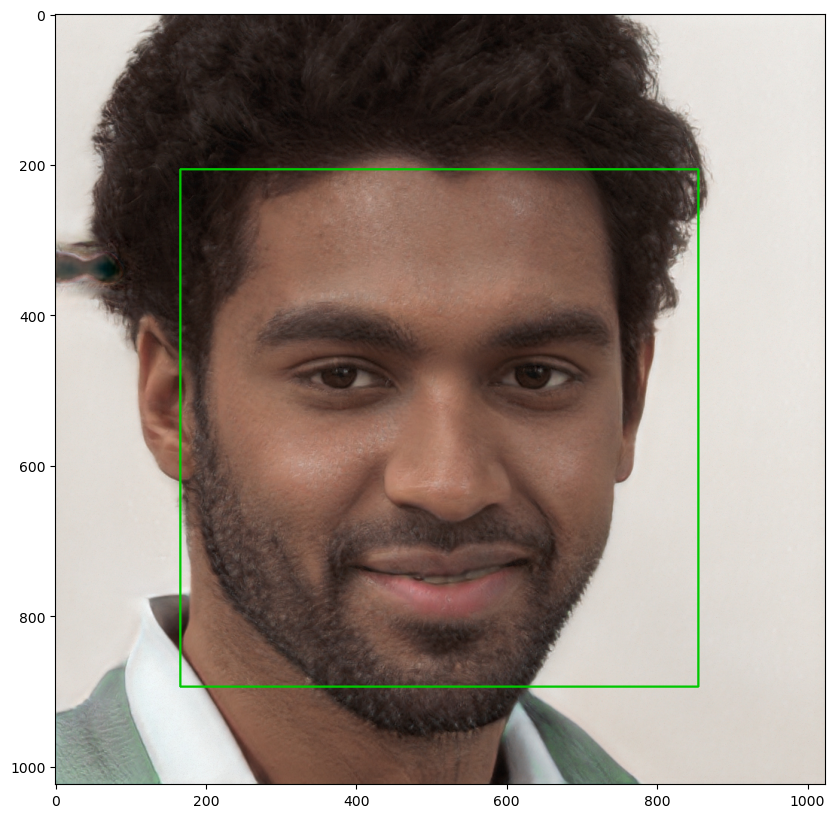

In [10]:
Clasifica_Cara = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
Clasifica_Ojos = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye_tree_eyeglasses.xml')
Imagen = cv2.imread('../PDITARRAGA/099509.jpg')
Filas,Columnas,Canales=Imagen.shape
Min_SizeFila=round(0.1*Filas)
Min_SizeCol=round(0.1*Columnas)
Max_SizeFila=round(0.6*Filas)
Max_SizeCol=round(0.6*Columnas)
imag_gray = cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
Detecta_cara = Clasifica_Cara.detectMultiScale(imag_gray, 1.1, 5)
## Se obtenie los limites de la cara
cordx=Detecta_cara[0,0] # corrdenadas de columnas
cordy=Detecta_cara[0,1]
ancho_cara=Detecta_cara[0,2]
largo_cara=Detecta_cara[0,3]
image_cuadro=cv2.rectangle(Imagen,(cordx,cordy),(cordx+ancho_cara,cordy+largo_cara),(0,200,0),2)
#
rgb_img = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
plt.figure(figsize = (20,10))
plt.imshow(rgb_img)

## Definiendo la ubicacion de los ojos

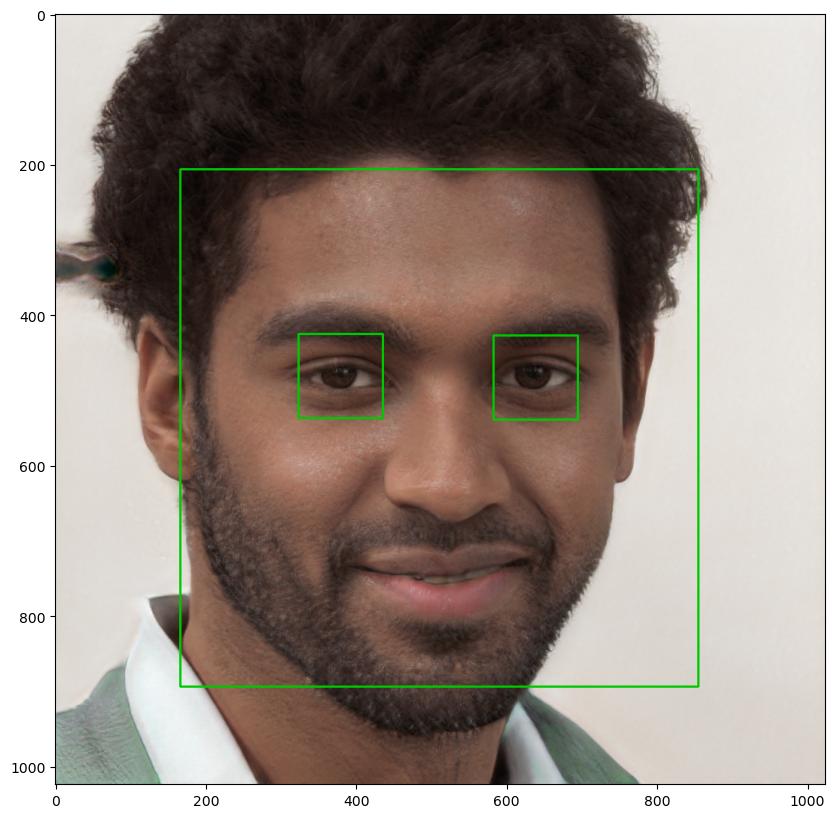

In [11]:
sector_ojos=round(largo_cara/2)
Cuadro_cara=Imagen[cordy:cordy+sector_ojos,cordx:cordx+ancho_cara] 
Cara_Gray=cv2.cvtColor(Cuadro_cara, cv2.COLOR_BGR2GRAY)
Ojos = Clasifica_Ojos.detectMultiScale(Cara_Gray)
# Coordenadas del primer ojo
Ojo1cordx=Ojos[0,0] # corrdenadas de columnas
Ojo1cordy=Ojos[0,1]
ancho_ojo1=Ojos[0,2]
largo_ojo1=Ojos[0,3]
x0_ojo1=cordx+Ojo1cordx
y0_ojo1=cordy+Ojo1cordy
ojo1=cv2.rectangle(Imagen,(x0_ojo1,y0_ojo1),(x0_ojo1+ancho_ojo1,y0_ojo1+largo_ojo1),(0,200,0),2)
rgb_img = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
# corrdenadas segundo ojo
Ojo2cordx=Ojos[1,0] 
Ojo2cordy=Ojos[1,1]
ancho_ojo2=Ojos[1,2]
largo_ojo2=Ojos[1,3]
ojo2=cv2.rectangle(Imagen,(cordx+Ojo2cordx,cordy+Ojo2cordy),(cordx+Ojo2cordx+ancho_ojo2,cordy+Ojo2cordy+largo_ojo2),(0,200,0),2)
rgb_img = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
plt.figure(figsize = (20,10))
plt.imshow(rgb_img)

## Ahora se busca objetivamente dentro de los ojos
### Ojo izquierdo (Ojo1)

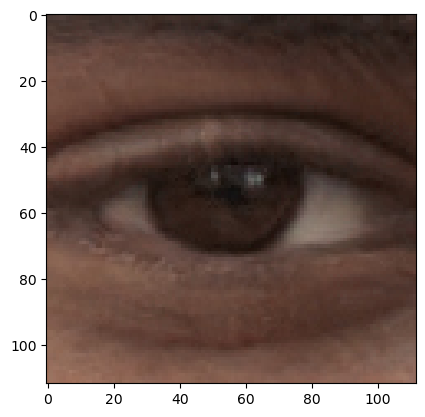

In [12]:
Imagen_Ojo = cv2.imread('../PDITARRAGA/099509.jpg')
rgb_img2 = cv2.cvtColor(Imagen_Ojo, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
cuadro_ojo1=rgb_img2[y0_ojo1:y0_ojo1+ancho_ojo1,x0_ojo1:x0_ojo1+largo_ojo1]

plt.imshow(cuadro_ojo1)

5


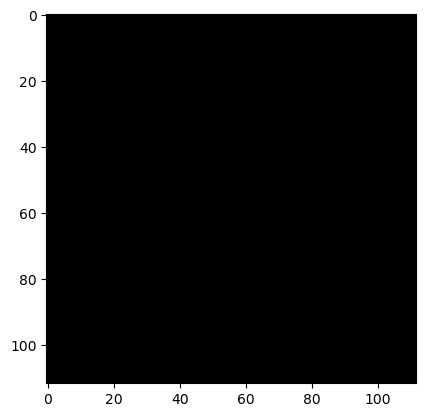

In [13]:
BlancoBajo = np.array([0, 0, 0], np.uint8)
BlancoAlto = np.array([255, 40, 255], np.uint8)
frameHSV = cv2.cvtColor(cuadro_ojo1, cv2.COLOR_BGR2HSV)
maskBlanco = cv2.inRange(frameHSV, BlancoBajo,BlancoAlto)
## Encontrando los contornos
contornos,_ = cv2.findContours(maskBlanco, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) ## Bordes externos,
#contornos = sorted(contornos, key=cv2.contourArea, reverse=True)
#cv2.drawContours(frame, contornos, -1, (255,0,0), 3)
maskcontornos = cv2.drawContours(maskBlanco, contornos, -1, (0,255,75), 2)
print(len(contornos))
plt.imshow(maskcontornos, cmap=plt.cm.gray)

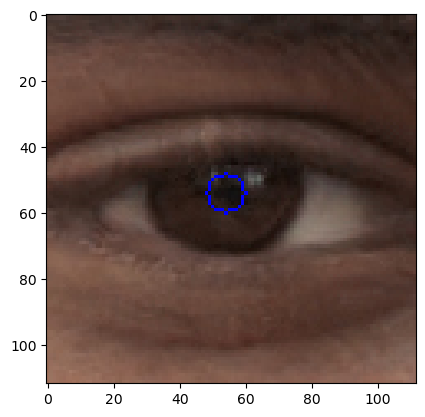

In [14]:
(x1,y1),radius1 = cv2.minEnclosingCircle(contornos[0])
centro1 = (int(x1),int(y1))
radio1 = int(radius1)
(x2,y2),radius2 = cv2.minEnclosingCircle(contornos[1])
centro1 = (int(x2),int(y2))
radio2 = int(radius2)
xcent_ojo1=round((x1+x2)/2)
ycent_ojo1=round((y1+y2)/2)
imgWC = cv2.circle(cuadro_ojo1,(xcent_ojo1,ycent_ojo1),6,(0,0,255))
plt.imshow(imgWC)